<a href="https://colab.research.google.com/github/rubengamarro/practicas-aprendizaje-supervisado/blob/main/1_TAREA_Algoritmos_B%C3%A1sicos_De_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectores

In [ ]:
import numpy as np

#Esto es un comentario de una línea
print("Esto escribe una cadena por pantalla")
print("Definir un rango R1:")
R1=np.arange(10)
print(R1)
print("Definir un rango R2 de 3 a 10.5 paso 2.5:")
# Ojo: no incluye el final del rango, sería como un rango matemático [3, 10.5)
R2=np.arange(3,10.5,2.5)
print(R2)
print("Definir un rango R3 de 3 a 10.6 paso 2.5:")
R3=np.arange(3,10.6,2.5)
print(R3)
print("Elementos en el contenedor R3: %d" % len(R3))

Esto escribe una cadena por pantalla
Definir un rango R1:
[0 1 2 3 4 5 6 7 8 9]
Definir un rango R2 de 3 a 10.5 paso 2.5:
[3.  5.5 8. ]
Definir un rango R3 de 3 a 10.6 paso 2.5:
[ 3.   5.5  8.  10.5]
Elementos en el contenedor R3: 4


In [ ]:
print("Definir un vector V:")
V = np.array([10, 20, 30, 40])
print(V)
print("Elemento con id 2 en V: %d" % V[2])
# Ojo: str(vector) sirve para mostrar en una cadena el contenido del vector
print("Producto elemento a elemento de dos vectores V*V: " + str(V*V))
# Ojo: No hay que calcular el vector traspuesto para el producto escalar
print("Producto escalar de dos vectores V·V: " + str(V.dot(V)))
print("Suma de los elementos de un vector V: %d" % sum(V))
print("Constante por vector 10*V: " + str(10*V))

Definir un vector V:
[10 20 30 40]
Elemento con id 2 en V: 30
Producto elemento a elemento de dos vectores V*V: [ 100  400  900 1600]
Producto escalar de dos vectores V·V: 3000
Suma de los elementos de un vector V: 100
Constante por vector 10*V: [100 200 300 400]


# Matrices

In [ ]:
M = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print("Matriz M: ")
print(M)
print("Número de elementos en el contenedor matriz M: %d" % len(M))
print("Dimensiones de una matriz M: "+ str(M.shape))
print("Fila id 1 y columna id 2 de M: %d" % M[1,2])
print("Fila con id 1 de M: " + str(M[1,:]))
print("Columna con id 3 de M: " + str(M[:,3]))
print("Número de elementos en el contenedor fila id 1 de M: %d" % len(M[1,:]))
print("Cuadrado de los elementos de M: ")
print(M**2)
print("Matriz por vector M*V:")
print(M*V)

Matriz M: 
[[1 2 3 4]
 [5 6 7 8]]
Número de elementos en el contenedor matriz M: 2
Dimensiones de una matriz M: (2, 4)
Fila id 1 y columna id 2 de M: 7
Fila con id 1 de M: [5 6 7 8]
Columna con id 3 de M: [4 8]
Número de elementos en el contenedor fila id 1 de M: 4
Cuadrado de los elementos de M: 
[[ 1  4  9 16]
 [25 36 49 64]]
Matriz por vector M*V:
[[ 10  40  90 160]
 [ 50 120 210 320]]


In [ ]:
print("Traspuesta de una matriz M: ")
print(M.transpose())
p1=np.array([0.5, 2])
print("Vector de dos elementos p1: " + str(p1))
print("Producto elemento a elemento de matriz traspuesta por vector M'*p1: ")
print(M.transpose()*p1)
# Al hacer traspuesta tenemos Matriz 1x2 * 2x4 = 1x4:
print("Producto matricial de matriz traspuesta por vector p1'·M: ")
print((p1.transpose().dot(M)))
# Al hacer traspuesta tenemos Matriz 4x2 * 2x1 = 4x1:
print("Producto matricial de matriz traspuesta por vector M'·p1: ")
print((M.transpose().dot(p1)))

Traspuesta de una matriz M: 
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
Vector de dos elementos p1: [0.5 2. ]
Producto elemento a elemento de matriz traspuesta por vector M'*p1: 
[[ 0.5 10. ]
 [ 1.  12. ]
 [ 1.5 14. ]
 [ 2.  16. ]]
Producto matricial de matriz traspuesta por vector p1'·M: 
[10.5 13.  15.5 18. ]
Producto matricial de matriz traspuesta por vector M'·p1: 
[10.5 13.  15.5 18. ]


In [ ]:
A=np.array([1, 2, 3])
print("Vector A: " + str(A))
print("Vector A forzado a vector columna:")
A.shape = (3,1)
print(A)

Vector A: [1 2 3]
Vector A forzado a vector columna:
[[1]
 [2]
 [3]]


# Perceptrón

In [ ]:
import numpy as np
class Perceptron(object):
    """Perceptrón.

    Parámetros
    ----------
    eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    n_epoc : int
      Cantidad de épocas de entrenamiento
    estado_aleatorio : int
      Semilla generadora de número aleatorios para la inicialización de pesos
      aleatorios

    Atributos
    ---------
    w_ : 1d-array
      Pesos de la red.
    errores_ : list
      Cantidad de clasificaciones erróneas en cada época.

    """
    def __init__(self, eta=0.01, n_epoc=50, estado_aleatorio=1):
        self.eta = eta
        self.n_epoc = n_epoc
        self.estado_aleatorio = estado_aleatorio

    def entrenar(self, X, y):
        """ Ajustar los datos de entrenamiento

        Parámetros
        ----------
        X : {array-like}, shape = [n_muestras, n_features]
          Vectores de entrenamiento, donde n_muestras es la cantidad
          de muestras y n_features es la cantidad de rasgos/atributos.
        y : array-like, shape = [n_examples]
          Valores objetivos/deseados.

        Devuelve
        -------
        self : objecto

        """
        rgen = np.random.RandomState(self.estado_aleatorio)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errores_ = []

        for _ in range(self.n_epoc):
            errores = 0
            for xi, objetivo in zip(X, y):
                diferencia = self.eta * (objetivo - self.prediccion(xi))
                self.w_[0] += diferencia
                self.w_[1:] += diferencia * xi
                errores += int(diferencia != 0.0)
            self.errores_.append(errores)
        return self

    def potencial(self, X):
        """Calcular el potencial sináptico"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def prediccion(self, X):
        """Devuelve la etiqueta de clase para cada muestra"""
        return np.where(self.potencial(X) >= 0.0, 1, -1)

# Base de datos Iris

In [ ]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


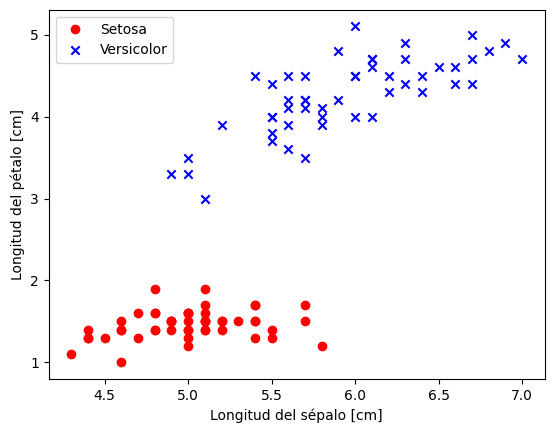

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Elegir setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extraer los atributos de la longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values
# Dibujar los datos
# Dibujar las muestras tipo Setosa
plt.scatter(X[y[:]==-1,0], X[y[:]==-1,1], color='red', marker='o', label='Setosa')
# Dibujar las muestras tipo Versicolor
plt.scatter(X[y[:]==1,0], X[y[:]==1,1], color='blue', marker='x', label='Versicolor')
# Dibujar leyenda y etiquetar los ejes
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='upper left')
plt.show()

# Perceptrón aplicado a la BD Iris

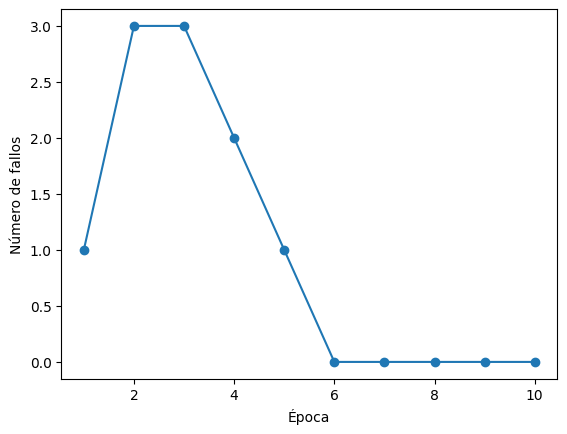

In [ ]:
# Crear perceptrón con 10 épocas y tasa de 0.1
percep = Perceptron(eta=0.1, n_epoc=10)
# Entrenar perceptrón con las 100 muestras de Iris
percep.entrenar(X, y)
# Dibujar la cantidad de errores en cada época
plt.plot(range(1, len(percep.errores_) + 1), percep.errores_, marker='o')
plt.xlabel('Época')
plt.ylabel('Número de fallos')
plt.show()

# Función para colorear áreas de decisión con dos rasgos

In [ ]:
from matplotlib.colors import ListedColormap
def pintar_regiones_decision(X, y, clasificador, resolucion=0.02):
    # Configurar los marcadores y el mapa de color
    marcadores = ('s', 'x', 'o', '^', 'v')
    colores = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Asignación de colores a las clases
    cmap = ListedColormap(colores[:len(np.unique(y))])

    # Preparar los márgenes de la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Preparar los valores puntuales de la superficie de decisión y el valor del
    # clasifidor para dichos puntos
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))

    # Pasamos la entrada a matriz con dos columnas para calcular la salida del
    # clasificador
    Z = clasificador.prediccion(np.array([xx1.reshape(-1), xx2.reshape(-1)]).T)
    # Convertimos la salida predicha al formato adecuado para pintar la
    # superficie
    Z = Z.reshape(xx1.shape)

    # Pintar el contorno de la superficie de decisión y se rellena también
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Pintar las muestras en la superficie de decisión
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colores[idx],
                     marker=marcadores[idx],
                     label=cl,
                     edgecolor='black')

<ipython-input-257-63463980460a>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


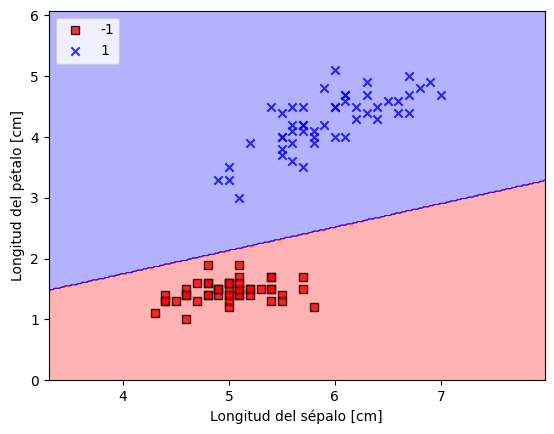

In [ ]:
pintar_regiones_decision(X, y, clasificador=percep)
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaline/Adalina

In [ ]:
class AdalineDG(object):
    """ADAptive LInear NEuron con Descenso por el Gradiente por lotes.

    Parámetros
    ----------
    eta : float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_epoc : int
        Cantidad de épocas de entrenamiento
    estado_aleatorio : int
      Semilla generadora de número aleatorios para la inicialización de pesos
      aleatorios

    Atributos
    ---------
    w_ : 1d-array
        Pesos sinápticos de la red.
    coste_ : list
        Suma de errores cuadráticos en cada época calculados con la función
        de coste.

    """
    def __init__(self, eta=0.01, n_epoc=50, estado_aleatorio=1):
        self.eta = eta
        self.n_epoc = n_epoc
        self.estado_aleatorio = estado_aleatorio

    def entrenar(self, X, y):
        """ Entrenar con muestras de entrenamiento.

        Parámetros
        ----------
        X : {array-like}, shape = [n_ejemplos, n_rasgos]
            Vectores de entrenamiento, donde n_ejemplos
            es el número de muestras y
            n_rasgos es el número de rasgos/atributos.
        y : array-like, shape = [n_ejemplos]
            Valores objetivos/deseados.

        Devuelve
        --------
        self : objecto

        """
        rgen = np.random.RandomState(self.estado_aleatorio)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.coste_ = []

        for i in range(self.n_epoc):
            # Cálculo de potenciales para las muestras del lote
            pot= self.potencial(X)
            # Cálculo de las salidas para el lote
            salidas = self.activacion(pot)
            # Cálculo de errores
            errores = (y - salidas)
            # Ajuste de cada peso
            self.w_[0] += self.eta * errores.sum()
            self.w_[1:] += self.eta * X.T.dot(errores)
            # Anotación del coste o error en esta i-ésima época
            coste_epoca = (errores**2).sum() / 2.0
            self.coste_.append(coste_epoca)
        return self

    def potencial(self, X):
        """Calcular el potencial sináptico para las muestras de un lote"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activacion(self, Pot):
        """Calcula la función de activación/transferencia"""
        return Pot

    def prediccion(self, X):
        """Devuelve la etiqueta de clase para cada muestra"""
        return np.where(self.activacion(self.potencial(X))
                        >= 0.0, 1, -1)

# Adaline aplicada a Iris

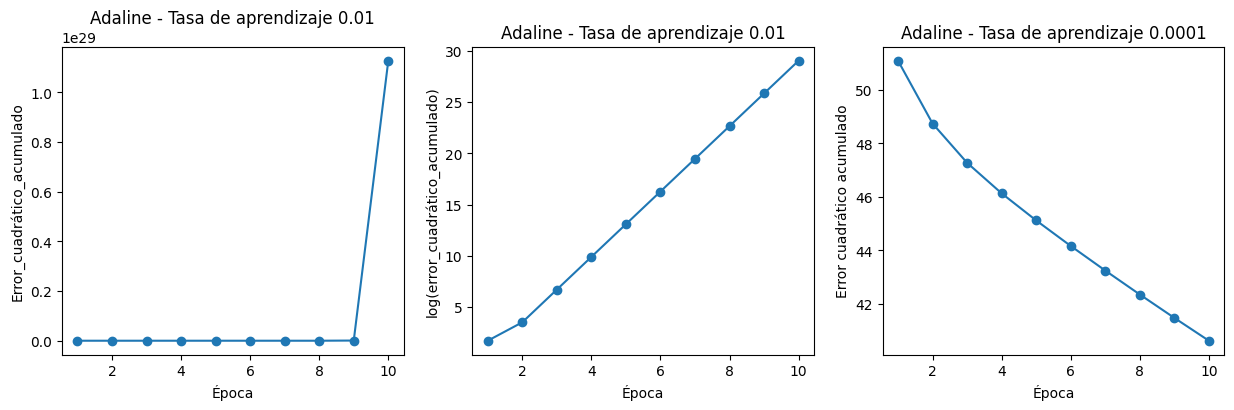

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ada1 = AdalineDG(n_epoc=10, eta=0.01).entrenar(X, y)
ax[0].plot(range(1, len(ada1.coste_) + 1), ada1.coste_, marker='o')
ax[0].set_xlabel('Época')
ax[0].set_ylabel('Error_cuadrático_acumulado')
ax[0].set_title('Adaline - Tasa de aprendizaje 0.01')
ax[1].plot(range(1, len(ada1.coste_) + 1), np.log10(ada1.coste_), marker='o')
ax[1].set_xlabel('Época')
ax[1].set_ylabel('log(error_cuadrático_acumulado)')
ax[1].set_title('Adaline - Tasa de aprendizaje 0.01')
ada2 = AdalineDG(n_epoc=10, eta=0.0001).entrenar(X, y)
ax[2].plot(range(1, len(ada2.coste_) + 1), ada2.coste_, marker='o')
ax[2].set_xlabel('Época')
ax[2].set_ylabel('Error cuadrático acumulado')
ax[2].set_title('Adaline - Tasa de aprendizaje 0.0001')
plt.show()

# Estandarización de las muestras

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# Adaline aplicada a Iris estandarizada

<ipython-input-257-63463980460a>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


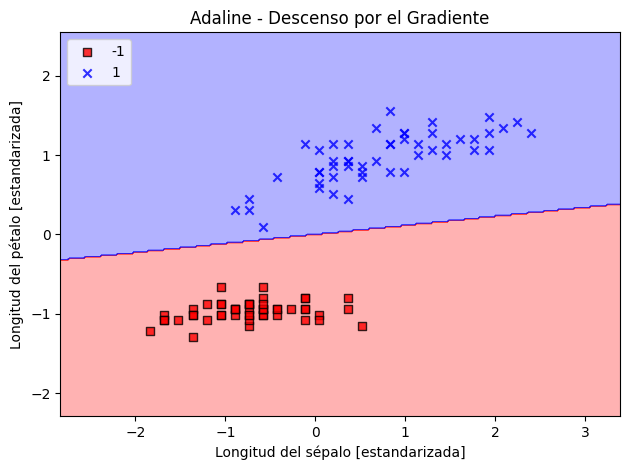

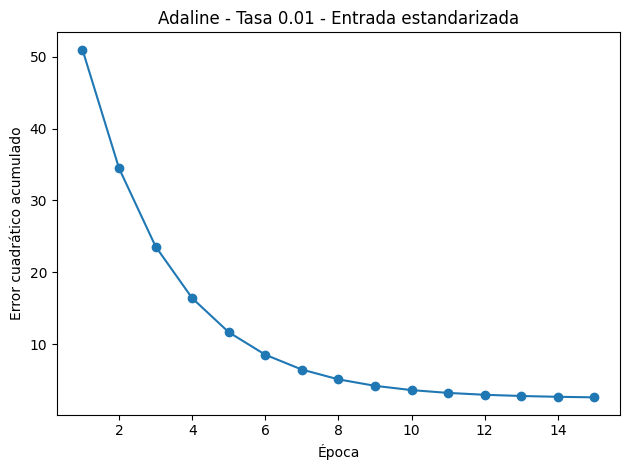

In [ ]:
ada_gd = AdalineDG(n_epoc=15, eta=0.01)
ada_gd.entrenar(X_std, y)
pintar_regiones_decision(X_std, y, clasificador=ada_gd)
plt.title('Adaline - Descenso por el Gradiente')
plt.xlabel('Longitud del sépalo [estandarizada]')
plt.ylabel('Longitud del pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.coste_) + 1), ada_gd.coste_, marker='o')
plt.title('Adaline - Tasa 0.01 - Entrada estandarizada')
plt.xlabel('Época')
plt.ylabel('Error cuadrático acumulado')
plt.tight_layout()
plt.show()

# Adaline/adalina estocástica

In [ ]:
class AdalineDGS(object):
    """ADAptive LInear NEuron con Descenso por el Gradiente eStocástico.

    Parámetros
    ------------
    eta : float
        Tasa de aprendizaje (entre 0.0 y 1.0)
    n_epoc : int
        Cantidad de épocas de entrenamiento
    barajar : bool (por defecto: True)
        Si True, baraja las muestras de entrenamiento en cada época para
        evitar ciclos.
    random_state : int
        Semilla generadora de número aleatorios para la inicialización de los
        pesos aleatorios.


    Atributos
    -----------
    w_ : 1d-array
        Pesos sinápticos de la neurona.
    coste_ : list
        Error cuadrático medio en las muestras de entrenamiento
        en cada época.


    """
    def __init__(self, eta=0.01, n_epoc=10,
              barajar=True, estado_aleatorio=None):
        self.eta = eta
        self.n_epoc = n_epoc
        self.w_inicializados = False
        self.barajar = barajar
        self.estado_aleatorio = estado_aleatorio

    def entrenar(self, X, y):
        """ Entrena la neurona con las muestras de entrenamiento

        Parámetros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Vectores de entrenamiento, donde n_examples
            es el número de muestras y n_features es el número de
            rasgos/atributos.
        y : array-like, shape = [n_examples]
            Valores objetivos/deseados.

        Devuelve
        -------
        self : objecto

        """
        self._inicializar_pesos(X.shape[1])
        self.coste_ = []
        for i in range(self.n_epoc):
            if self.barajar:
                X, y = self._barajar(X, y)
            coste_epoca = []
            for xi, objetivo in zip(X, y):
                coste_epoca.append(self._actualizar_pesos(xi, objetivo))
            coste_medio = sum(coste_epoca) / len(y)
            self.coste_.append(coste_medio)
        return self

    def entrenar_parcial(self, X, y):
        """Entrena con la muestras sin reiniciar los pesos cada vez"""
        if not self.w_inicializados:
            self._inicializar_pesos(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, objetivo in zip(X, y):
                self._actualizar_pesos(xi, objetivo)
        else:
            self._actualizar_pesos(X, y)
        return self

    def _barajar(self, X, y):
        """Baraja los datos de entrenamiento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _inicializar_pesos(self, n_rasgos):
        """Inicializa los pesos con números aleatorios pequeños"""
        self.rgen = np.random.RandomState(self.estado_aleatorio)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=1 + n_rasgos)
        self.w_inicializados = True

    def _actualizar_pesos(self, xi, objetivo):
        """Aplica la regla de aprendizaje de la Adaline para actualizar
        los pesos"""
        salida = self.activacion(self.potencial(xi))
        error = (objetivo - salida)
        self.w_[0] += self.eta * error
        self.w_[1:] += self.eta * xi.dot(error)
        coste = 0.5 * error**2
        return coste

    def potencial(self, X):
        """Calcula el potencial sináptico"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activacion(self, Pot):
        """Calcula la función de activación/transferencia
        (lineal en este caso)"""
        return Pot

    def prediccion(self, X):
        """Devuelve la etiqueta de clase para cada muestra"""
        return np.where(self.activacion(self.potencial(X))
                        >= 0.0, 1, -1)

# Adaline estocástica aplicada a Iris estandarizada

<ipython-input-257-63463980460a>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


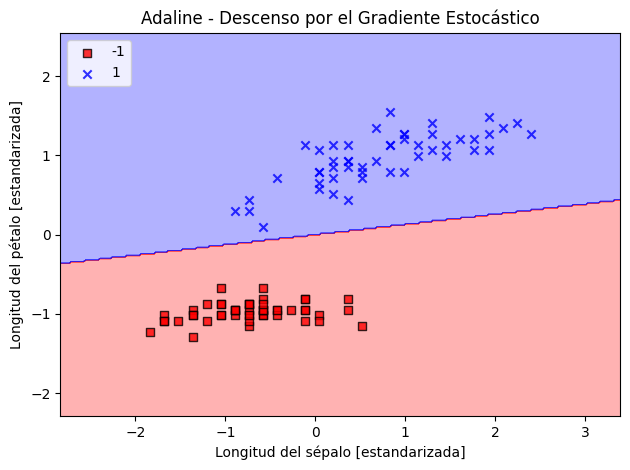

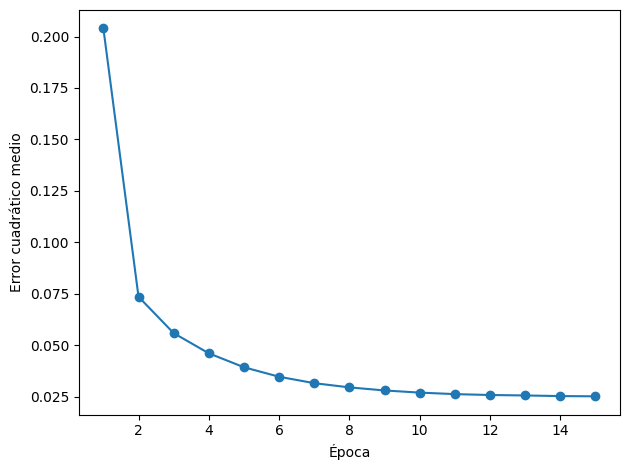

In [ ]:
ada_dgs = AdalineDGS(n_epoc=15, eta=0.01, estado_aleatorio=1)
ada_dgs.entrenar(X_std, y)
pintar_regiones_decision(X_std, y, clasificador=ada_dgs)
plt.title('Adaline - Descenso por el Gradiente Estocástico')
plt.xlabel('Longitud del sépalo [estandarizada]')
plt.ylabel('Longitud del pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_dgs.coste_) + 1), ada_dgs.coste_,marker='o')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.tight_layout()
plt.show()

#EJERCICIO 1

In [ ]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


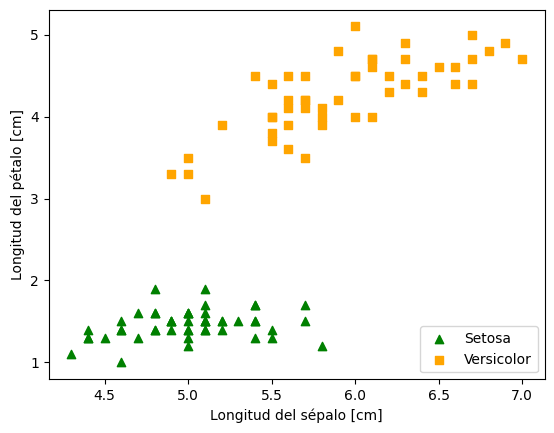

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Elegir setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extraer los atributos de la longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values
# Dibujar los datos
# Dibujar las muestras tipo Setosa
plt.scatter(X[y[:]==-1,0], X[y[:]==-1,1], color='green', marker='^', label='Setosa')
# Dibujar las muestras tipo Versicolor
plt.scatter(X[y[:]==1,0], X[y[:]==1,1], color='orange', marker='s', label='Versicolor')
# Dibujar leyenda y etiquetar los ejes
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='lower right')
plt.show()

#EJERCICIO 2

In [ ]:
from matplotlib.colors import ListedColormap
def pintar_regiones_decision_zoom(X, y, clasificador, resolucion=0.02):
    # Configurar los marcadores y el mapa de color
    marcadores = ('s', 'x', 'o', '^', 'v')
    colores = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Asignación de colores a las clases
    cmap = ListedColormap(colores[:len(np.unique(y))])

    # Preparar los márgenes de la superficie de decisión
    x1_min, x1_max = 5, 6
    x2_min, x2_max = 1.5, 4

    # Preparar los valores puntuales de la superficie de decisión y el valor del
    # clasifidor para dichos puntos
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))

    # Pasamos la entrada a matriz con dos columnas para calcular la salida del
    # clasificador
    Z = clasificador.prediccion(np.array([xx1.reshape(-1), xx2.reshape(-1)]).T)
    # Convertimos la salida predicha al formato adecuado para pintar la
    # superficie
    Z = Z.reshape(xx1.shape)

    # Pintar el contorno de la superficie de decisión y se rellena también
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Pintar las muestras en la superficie de decisión
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colores[idx],
                     marker=marcadores[idx],
                     label=cl,
                     edgecolor='black')

<ipython-input-267-6a92cc6e49b5>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


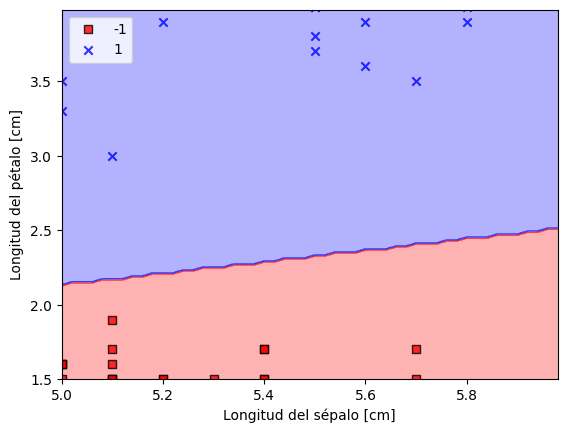

In [ ]:
pintar_regiones_decision_zoom(X, y, clasificador=percep)
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='upper left')
plt.show()

#EJERCICIO 3

<ipython-input-257-63463980460a>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


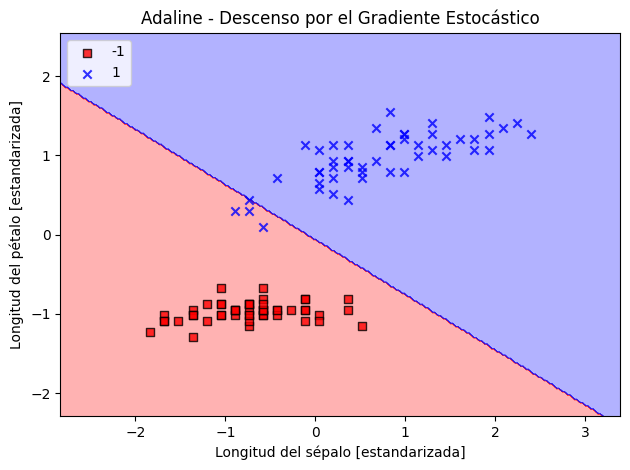

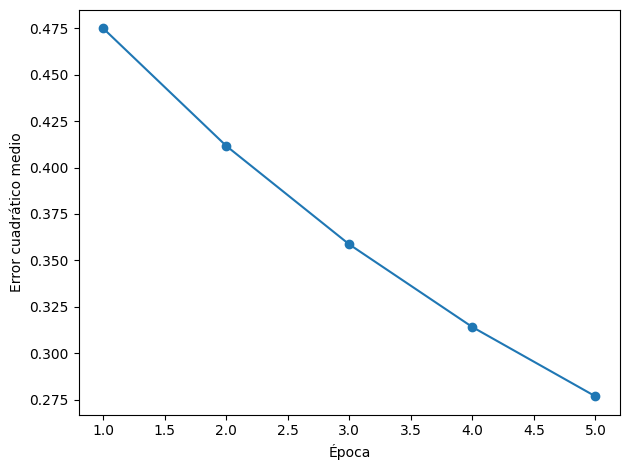

In [ ]:
ada_dgs = AdalineDGS(n_epoc=5, eta=0.0005, estado_aleatorio=1)
ada_dgs.entrenar(X_std, y)
pintar_regiones_decision(X_std, y, clasificador=ada_dgs)
plt.title('Adaline - Descenso por el Gradiente Estocástico')
plt.xlabel('Longitud del sépalo [estandarizada]')
plt.ylabel('Longitud del pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_dgs.coste_) + 1), ada_dgs.coste_,marker='o')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.tight_layout()
plt.show()

#EJERCICIO 4

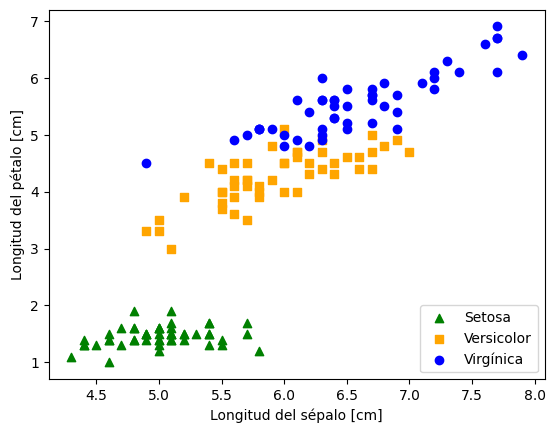

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Elegir setosa y versicolor
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, np.where(y == 'Iris-versicolor', 0, 1))
# extraer los atributos de la longitud del sépalo y del pétalo
X = df.iloc[:, [0, 2]].values
# Dibujar los datos
# Dibujar las muestras tipo Setosa
plt.scatter(X[y[:]==-1,0], X[y[:]==-1,1], color='green', marker='^', label='Setosa')
# Dibujar las muestras tipo Versicolor
plt.scatter(X[y[:]==0,0], X[y[:]==0,1], color='orange', marker='s', label='Versicolor')
# Dibujar las muestras tipo Virgínica
plt.scatter(X[y[:]==1,0], X[y[:]==1,1], color='blue', marker='o', label='Virgínica')
# Dibujar leyenda y etiquetar los ejes
plt.xlabel('Longitud del sépalo [cm]')
plt.ylabel('Longitud del pétalo [cm]')
plt.legend(loc='lower right')
plt.show()

#EJERCICIO 5

In [ ]:
df5 = pd.read_csv('glass.csv', names=['ID','RI','Na','Mg','Al','Si','K','Ca',
'Ba','Fe','ClaseCristal'])

In [ ]:
df5

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ClaseCristal
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
X = df5.iloc[:, [2, 4]].values
y = df5['ClaseCristal'].apply(lambda x: 1 if x in [5,6,7] else -1).values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

<ipython-input-257-63463980460a>:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


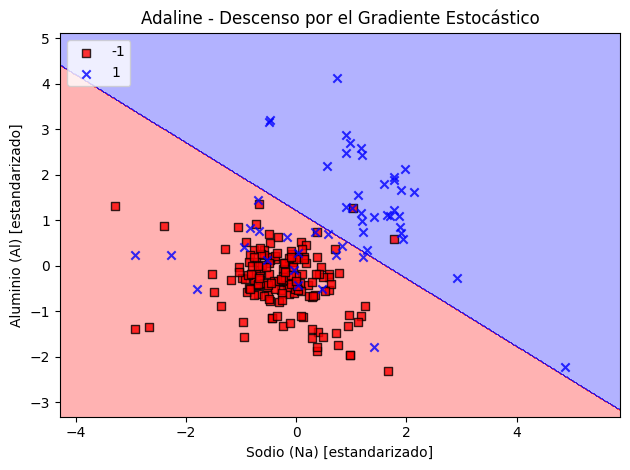

In [ ]:
ada_dgs = AdalineDGS(n_epoc=20, eta=0.005, estado_aleatorio=1)
ada_dgs.entrenar(X_std, y)
pintar_regiones_decision(X_std, y, clasificador=ada_dgs)
plt.title('Adaline - Descenso por el Gradiente Estocástico')
plt.xlabel('Sodio (Na) [estandarizado]')
plt.ylabel('Aluminio (Al) [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

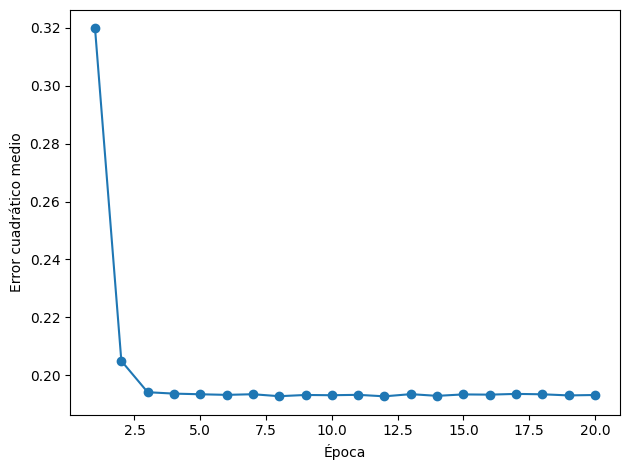

In [ ]:
plt.plot(range(1, len(ada_dgs.coste_) + 1), ada_dgs.coste_, marker='o')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.tight_layout()
plt.show()

#EJERCICIO 6

In [ ]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Elegir setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extraer los atributos de la longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

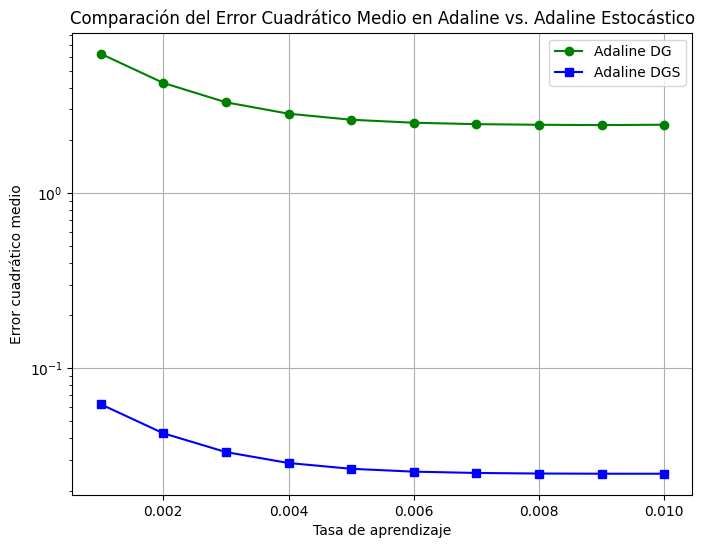

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tasas_aprendizaje = np.arange(0.001, 0.011, 0.001)
errors_dg = []
errors_dgs = []

for eta in tasas_aprendizaje:
    adaline_dg = AdalineDG(eta=eta, n_epoc=20)
    adaline_dgs = AdalineDGS(eta=eta, n_epoc=20, estado_aleatorio=1)

    adaline_dg.entrenar(X_std, y)
    adaline_dgs.entrenar(X_std, y)

    errors_dg.append(adaline_dg.coste_[-1])
    errors_dgs.append(adaline_dgs.coste_[-1])

plt.figure(figsize=(8, 6))
plt.plot(tasas_aprendizaje, errors_dg, marker='o', color='green', label='Adaline DG')
plt.plot(tasas_aprendizaje, errors_dgs, marker='s', color='blue', label='Adaline DGS')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Tasa de aprendizaje')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.title('Comparación del Error Cuadrático Medio en Adaline vs. Adaline Estocástico')
plt.grid()
plt.show()

#EJERCICIO 7

In [ ]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris','iris.data')
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Elegir setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extraer los atributos de la longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
class AdalineDGDecreciente(AdalineDG):
    """
    Adaline con descenso por gradiente por lotes y tasa de aprendizaje decreciente.
    """
    def entrenar(self, X, y):
        """ Entrenar con muestras de entrenamiento.

        Parámetros
        ----------
        X : {array-like}, shape = [n_ejemplos, n_rasgos]
            Vectores de entrenamiento, donde n_ejemplos
            es el número de muestras y
            n_rasgos es el número de rasgos/atributos.
        y : array-like, shape = [n_ejemplos]
            Valores objetivos/deseados.

        Devuelve
        --------
        self : objecto

        """
        rgen = np.random.RandomState(self.estado_aleatorio)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.coste_ = []

        for i in range(self.n_epoc):
            tasa_actual = self.eta * np.exp(-i / self.n_epoc)
            # Cálculo de potenciales para las muestras del lote
            pot= self.potencial(X)
            # Cálculo de las salidas para el lote
            salidas = self.activacion(pot)
            # Cálculo de errores
            errores = (y - salidas)
            # Ajuste de cada peso
            self.w_[0] += tasa_actual * errores.sum()
            self.w_[1:] += tasa_actual * X.T.dot(errores)
            # Anotación del coste o error en esta i-ésima época
            coste_epoca = (errores**2).sum() / 2.0
            self.coste_.append(coste_epoca)
        return self

class AdalineDGSDecreciente(AdalineDGS):
    """
    Adaline con descenso por gradiente estocástico y tasa de aprendizaje decreciente.
    """
    def entrenar(self, X, y):
        """ Entrena la neurona con las muestras de entrenamiento

        Parámetros
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Vectores de entrenamiento, donde n_examples
            es el número de muestras y n_features es el número de
            rasgos/atributos.
        y : array-like, shape = [n_examples]
            Valores objetivos/deseados.

        Devuelve
        -------
        self : objecto

        """
        self._inicializar_pesos(X.shape[1])
        self.coste_ = []
        for i in range(self.n_epoc):
            tasa_actual = self.eta * np.exp(-i / self.n_epoc)
            if self.barajar:
                X, y = self._barajar(X, y)
            coste_epoca = []
            for xi, objetivo in zip(X, y):
                # Cálculo de potenciales para las muestras del lote
                pot= self.potencial(xi)
                # Cálculo de las salidas para el lote
                salidas = self.activacion(pot)
                # Cálculo de errores
                errores = (objetivo - salidas)
                # Ajuste de cada peso
                self.w_[0] += tasa_actual * errores.sum()
                self.w_[1:] += tasa_actual * xi.T.dot(errores)

                coste_epoca.append(self._actualizar_pesos(xi, objetivo))
            coste_medio = sum(coste_epoca) / len(y)
            self.coste_.append(coste_medio)
        return self

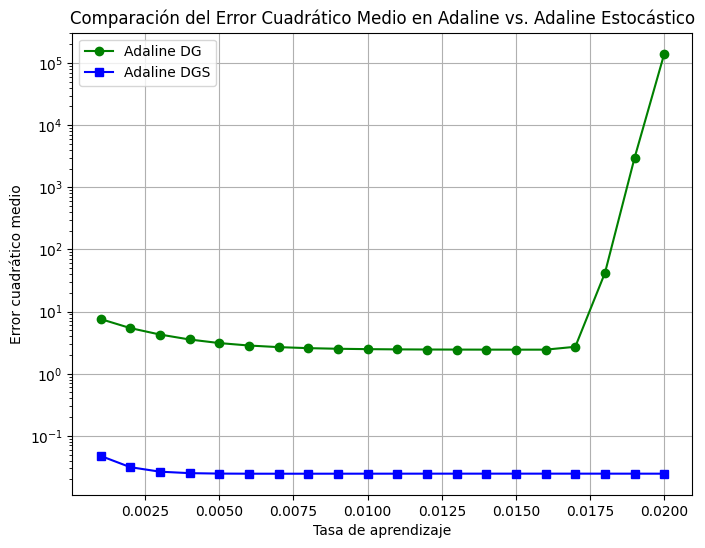

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tasas_aprendizaje = np.arange(0.001, 0.021, 0.001)
errors_dg = []
errors_dgs = []

for eta in tasas_aprendizaje:
    adaline_dg = AdalineDGDecreciente(eta=eta, n_epoc=20)
    adaline_dgs = AdalineDGSDecreciente(eta=eta, n_epoc=20, estado_aleatorio=1)

    adaline_dg.entrenar(X_std, y)
    adaline_dgs.entrenar(X_std, y)

    errors_dg.append(adaline_dg.coste_[-1])
    errors_dgs.append(adaline_dgs.coste_[-1])

plt.figure(figsize=(8, 6))
plt.plot(tasas_aprendizaje, errors_dg, marker='o', color='green', label='Adaline DG')
plt.plot(tasas_aprendizaje, errors_dgs, marker='s', color='blue', label='Adaline DGS')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Tasa de aprendizaje')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.title('Comparación del Error Cuadrático Medio en Adaline vs. Adaline Estocástico')
plt.grid()
plt.show()